<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/SimuCOVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
# SEIR states
susceptible = 0
exposed = 8
infectious = 10
recovered = 4

In [3]:
# temp use
exposed_temp = -1
infectious_temp = -2

In [4]:
N = 660000 # 总人口
N_infected = 26  # 初始感染人口
N_recovered = 517440  # 群体免疫阈值
beta = 0.3 # 传染率
gamma = 1 / 10 # 恢复率
sigma = 1 / 5 # 暴露人员变为感染的概率

In [5]:
# the number of each state during the simulation
susceptible_list = []
exposed_list = []
infectious_list = []
recovered_list = []

In [6]:
# count the number of each state
def count_susceptible(population: np.ndarray):
    return int(np.sum(population == susceptible))


def count_exposed(population: np.ndarray):
    return int(np.sum(population == exposed))


def count_infectious(population: np.ndarray):
    return int(np.sum(population == infectious))


def count_recovered(population: np.ndarray):
    return int(np.sum(population == recovered))

In [7]:
# init U.K. population
def init_pop(num: int, num_infected: int, num_recovered: int = 0):
    length = math.floor(math.sqrt(num))
    population = np.zeros((length, length))
    population += susceptible
    if num_recovered:  # init recovered people
        rows = np.random.choice(range(length), num_recovered)
        columns = np.random.choice(range(length), num_recovered)
        for i in range(num_recovered):
            population[rows[i]][columns[i]] = recovered
    rows = np.random.choice(range(length), num_infected)
    columns = np.random.choice(range(length), num_infected)
    for i in range(num_infected):  # init infected people
        population[rows[i]][columns[i]] = infectious
    return population

In [8]:
# infect one cell
def infect(population: np.ndarray, i: int, j: int):
    if population[i][j] != susceptible:  # if this cell is not susceptible, just return
        return
    elif np.random.binomial(n=1, p=beta):
        population[i][j] = exposed_temp


In [9]:
# infect around cells
def infect_around(population: np.ndarray, i: int, j: int):
    size = population.shape[0]
    if i != 0:
        infect(population, i - 1, j)
    if j != 0:
        infect(population, i, j - 1)
    if i < size - 1:
        infect(population, i + 1, j)
    if j < size - 1:
        infect(population, i, j + 1)


In [15]:
# spread by day
def daily_spread(population: np.ndarray, day: int):
    size = population.shape[0]
    print("At day {}, only {} people are never infected.".format(day, count_susceptible(population)))
    for i in range(size):
        for j in range(size):
            if population[i][j] == susceptible or population[i][j] == recovered:
                continue
            if population[i][j] == exposed or population[i][j] == infectious:
                infect_around(population, i, j)
                if population[i][j] == infectious:
                    if np.random.binomial(n=1, p=gamma):
                        population[i][j] = recovered
                elif population[i][j] == exposed:
                    if np.random.binomial(n=1, p=sigma):
                        population[i][j] = infectious_temp
    population[population == exposed_temp] = exposed
    population[population == infectious_temp] = infectious
    susceptible_list.append(count_susceptible(population))
    exposed_list.append(count_exposed(population))
    infectious_list.append(count_infectious(population))
    recovered_list.append(count_recovered(population))


def spread_by_days(population: np.ndarray, days: int):
    plt.figure()
    plt.ion()
    for day in range(days):
        daily_spread(population, day)
        if day % 10 == 0:
            plt.imshow(population, cmap="Greys")
            plt.show()


def spread_until_convergence(population: np.ndarray):
    plt.figure()
    plt.ion()
    day = -1
    while True:
        day += 1
        daily_spread(population, day)
        if day % 10 == 0:
            plt.imshow(population, cmap="OrRd")
            plt.show()
        if day > 30 and (infectious_list[-1] + exposed_list[-1]) < population.size * 1e-3:
            return


def draw():
    plt.figure()
    plt.grid(True)
    plt.xlabel("day")
    plt.ylabel("cases")
    plt.plot(susceptible_list)
    plt.plot(exposed_list)
    plt.plot(infectious_list)
    plt.plot(recovered_list)
    plt.legend(["susceptible", "exposed", "infectious", "recovered"])
    plt.show()


In [11]:
#模拟群体免疫
def herd_immune():
    pop = init_pop(N, N_infected, N_recovered)
    spread_by_days(pop, 90)


In [12]:
#模拟实际情况
def simulate():
    pop = init_pop(N, N_infected)
    spread_until_convergence(pop)

At day 0, only 659318 people are never infected.


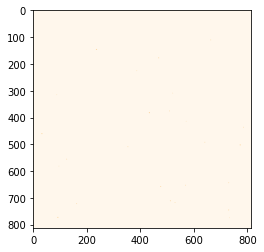

At day 1, only 659281 people are never infected.
At day 2, only 659234 people are never infected.
At day 3, only 659155 people are never infected.
At day 4, only 659054 people are never infected.
At day 5, only 658927 people are never infected.
At day 6, only 658760 people are never infected.
At day 7, only 658578 people are never infected.
At day 8, only 658383 people are never infected.
At day 9, only 658157 people are never infected.
At day 10, only 657920 people are never infected.


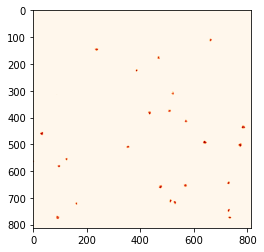

At day 11, only 657627 people are never infected.
At day 12, only 657276 people are never infected.
At day 13, only 656941 people are never infected.
At day 14, only 656517 people are never infected.
At day 15, only 656118 people are never infected.
At day 16, only 655654 people are never infected.
At day 17, only 655157 people are never infected.
At day 18, only 654632 people are never infected.
At day 19, only 654079 people are never infected.
At day 20, only 653481 people are never infected.


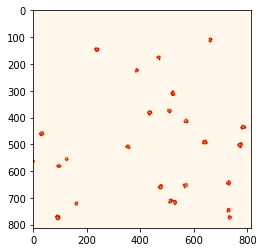

At day 21, only 652824 people are never infected.
At day 22, only 652201 people are never infected.
At day 23, only 651530 people are never infected.
At day 24, only 650835 people are never infected.
At day 25, only 650106 people are never infected.
At day 26, only 649324 people are never infected.
At day 27, only 648493 people are never infected.
At day 28, only 647617 people are never infected.
At day 29, only 646764 people are never infected.
At day 30, only 645821 people are never infected.


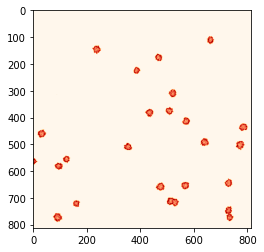

At day 31, only 644842 people are never infected.
At day 32, only 643829 people are never infected.
At day 33, only 642788 people are never infected.
At day 34, only 641723 people are never infected.
At day 35, only 640623 people are never infected.
At day 36, only 639469 people are never infected.
At day 37, only 638278 people are never infected.
At day 38, only 637083 people are never infected.
At day 39, only 635858 people are never infected.
At day 40, only 634581 people are never infected.


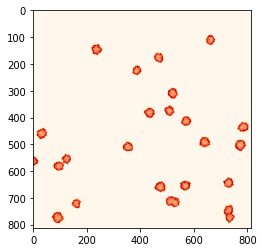

At day 41, only 633322 people are never infected.
At day 42, only 631986 people are never infected.
At day 43, only 630648 people are never infected.
At day 44, only 629236 people are never infected.
At day 45, only 627826 people are never infected.
At day 46, only 626377 people are never infected.
At day 47, only 624922 people are never infected.
At day 48, only 623401 people are never infected.
At day 49, only 621838 people are never infected.
At day 50, only 620200 people are never infected.


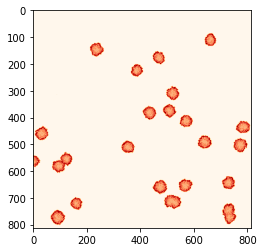

At day 51, only 618544 people are never infected.
At day 52, only 616875 people are never infected.
At day 53, only 615220 people are never infected.
At day 54, only 613563 people are never infected.
At day 55, only 611792 people are never infected.
At day 56, only 610015 people are never infected.
At day 57, only 608225 people are never infected.
At day 58, only 606440 people are never infected.
At day 59, only 604601 people are never infected.
At day 60, only 602666 people are never infected.


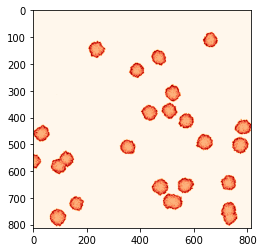

At day 61, only 600696 people are never infected.
At day 62, only 598712 people are never infected.
At day 63, only 596759 people are never infected.
At day 64, only 594638 people are never infected.
At day 65, only 592579 people are never infected.
At day 66, only 590517 people are never infected.
At day 67, only 588384 people are never infected.
At day 68, only 586329 people are never infected.
At day 69, only 584185 people are never infected.
At day 70, only 582052 people are never infected.


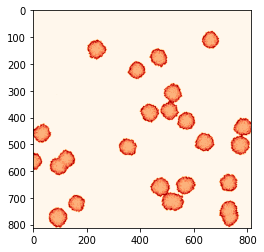

At day 71, only 579843 people are never infected.
At day 72, only 577642 people are never infected.
At day 73, only 575419 people are never infected.
At day 74, only 573145 people are never infected.
At day 75, only 570777 people are never infected.
At day 76, only 568387 people are never infected.
At day 77, only 565982 people are never infected.
At day 78, only 563602 people are never infected.
At day 79, only 561250 people are never infected.
At day 80, only 558903 people are never infected.


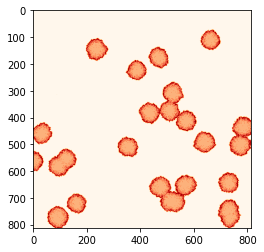

At day 81, only 556538 people are never infected.
At day 82, only 554048 people are never infected.
At day 83, only 551689 people are never infected.
At day 84, only 549265 people are never infected.
At day 85, only 546845 people are never infected.
At day 86, only 544391 people are never infected.
At day 87, only 541985 people are never infected.
At day 88, only 539557 people are never infected.
At day 89, only 537057 people are never infected.
At day 90, only 534551 people are never infected.


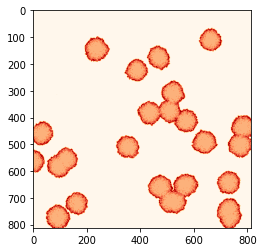

At day 91, only 532009 people are never infected.
At day 92, only 529466 people are never infected.
At day 93, only 526932 people are never infected.
At day 94, only 524366 people are never infected.
At day 95, only 521831 people are never infected.
At day 96, only 519260 people are never infected.
At day 97, only 516646 people are never infected.
At day 98, only 514075 people are never infected.
At day 99, only 511556 people are never infected.
At day 100, only 508914 people are never infected.


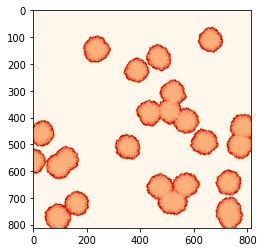

At day 101, only 506308 people are never infected.
At day 102, only 503741 people are never infected.
At day 103, only 501140 people are never infected.
At day 104, only 498449 people are never infected.
At day 105, only 495760 people are never infected.
At day 106, only 493021 people are never infected.
At day 107, only 490275 people are never infected.
At day 108, only 487591 people are never infected.
At day 109, only 484850 people are never infected.
At day 110, only 482154 people are never infected.


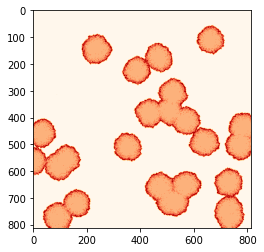

At day 111, only 479449 people are never infected.
At day 112, only 476769 people are never infected.
At day 113, only 474046 people are never infected.
At day 114, only 471364 people are never infected.
At day 115, only 468652 people are never infected.
At day 116, only 465976 people are never infected.
At day 117, only 463269 people are never infected.
At day 118, only 460570 people are never infected.
At day 119, only 457857 people are never infected.
At day 120, only 455182 people are never infected.


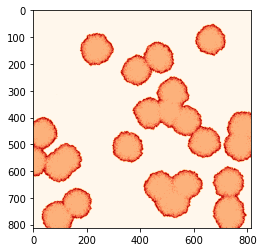

At day 121, only 452435 people are never infected.
At day 122, only 449761 people are never infected.
At day 123, only 446988 people are never infected.
At day 124, only 444217 people are never infected.
At day 125, only 441497 people are never infected.
At day 126, only 438762 people are never infected.
At day 127, only 436016 people are never infected.
At day 128, only 433279 people are never infected.
At day 129, only 430431 people are never infected.
At day 130, only 427735 people are never infected.


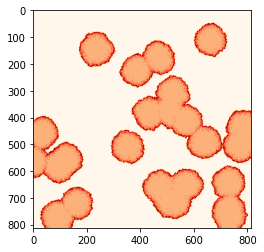

At day 131, only 424894 people are never infected.
At day 132, only 422001 people are never infected.
At day 133, only 419146 people are never infected.
At day 134, only 416315 people are never infected.
At day 135, only 413424 people are never infected.
At day 136, only 410594 people are never infected.
At day 137, only 407769 people are never infected.
At day 138, only 404911 people are never infected.
At day 139, only 402071 people are never infected.
At day 140, only 399163 people are never infected.


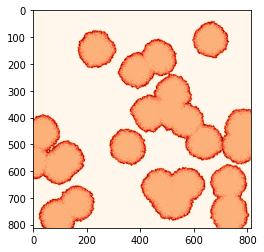

At day 141, only 396336 people are never infected.
At day 142, only 393447 people are never infected.
At day 143, only 390614 people are never infected.
At day 144, only 387753 people are never infected.
At day 145, only 384917 people are never infected.
At day 146, only 382054 people are never infected.
At day 147, only 379114 people are never infected.
At day 148, only 376213 people are never infected.
At day 149, only 373358 people are never infected.
At day 150, only 370445 people are never infected.


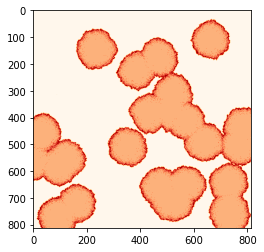

At day 151, only 367603 people are never infected.
At day 152, only 364821 people are never infected.
At day 153, only 362025 people are never infected.
At day 154, only 359205 people are never infected.
At day 155, only 356417 people are never infected.
At day 156, only 353593 people are never infected.
At day 157, only 350761 people are never infected.
At day 158, only 347933 people are never infected.
At day 159, only 345152 people are never infected.
At day 160, only 342456 people are never infected.


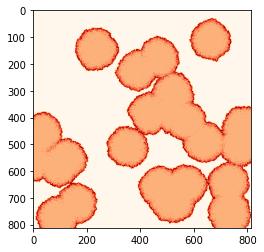

At day 161, only 339629 people are never infected.
At day 162, only 336883 people are never infected.
At day 163, only 334117 people are never infected.
At day 164, only 331346 people are never infected.
At day 165, only 328603 people are never infected.
At day 166, only 325875 people are never infected.
At day 167, only 323172 people are never infected.
At day 168, only 320529 people are never infected.
At day 169, only 317872 people are never infected.
At day 170, only 315220 people are never infected.


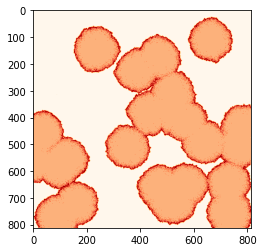

At day 171, only 312550 people are never infected.
At day 172, only 310018 people are never infected.
At day 173, only 307376 people are never infected.
At day 174, only 304809 people are never infected.
At day 175, only 302252 people are never infected.
At day 176, only 299674 people are never infected.
At day 177, only 297112 people are never infected.
At day 178, only 294570 people are never infected.
At day 179, only 292072 people are never infected.
At day 180, only 289583 people are never infected.


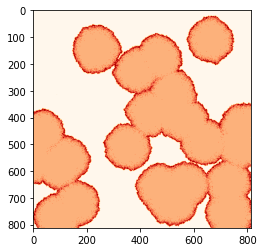

At day 181, only 287019 people are never infected.
At day 182, only 284529 people are never infected.
At day 183, only 282042 people are never infected.
At day 184, only 279568 people are never infected.
At day 185, only 277086 people are never infected.
At day 186, only 274660 people are never infected.
At day 187, only 272280 people are never infected.
At day 188, only 269893 people are never infected.
At day 189, only 267543 people are never infected.
At day 190, only 265209 people are never infected.


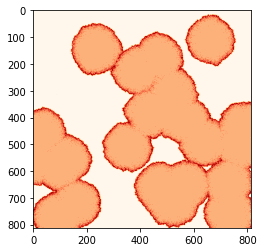

At day 191, only 262897 people are never infected.
At day 192, only 260683 people are never infected.
At day 193, only 258434 people are never infected.
At day 194, only 256162 people are never infected.
At day 195, only 253935 people are never infected.
At day 196, only 251713 people are never infected.
At day 197, only 249518 people are never infected.
At day 198, only 247334 people are never infected.
At day 199, only 245202 people are never infected.
At day 200, only 243048 people are never infected.


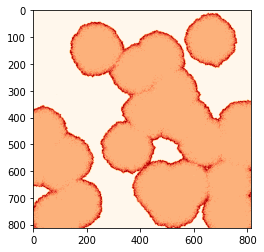

At day 201, only 240945 people are never infected.
At day 202, only 238893 people are never infected.
At day 203, only 236808 people are never infected.
At day 204, only 234784 people are never infected.
At day 205, only 232725 people are never infected.
At day 206, only 230665 people are never infected.
At day 207, only 228579 people are never infected.
At day 208, only 226586 people are never infected.
At day 209, only 224542 people are never infected.
At day 210, only 222549 people are never infected.


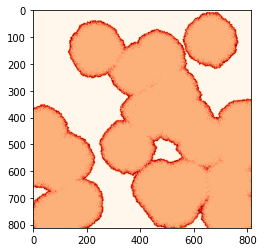

At day 211, only 220568 people are never infected.
At day 212, only 218569 people are never infected.
At day 213, only 216586 people are never infected.
At day 214, only 214633 people are never infected.
At day 215, only 212694 people are never infected.
At day 216, only 210767 people are never infected.
At day 217, only 208803 people are never infected.
At day 218, only 206906 people are never infected.
At day 219, only 205017 people are never infected.
At day 220, only 203101 people are never infected.


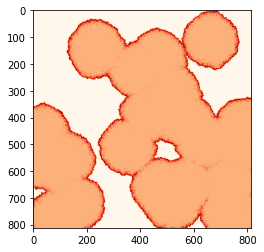

At day 221, only 201232 people are never infected.
At day 222, only 199361 people are never infected.
At day 223, only 197495 people are never infected.
At day 224, only 195627 people are never infected.
At day 225, only 193818 people are never infected.
At day 226, only 191968 people are never infected.
At day 227, only 190138 people are never infected.
At day 228, only 188301 people are never infected.
At day 229, only 186517 people are never infected.
At day 230, only 184735 people are never infected.


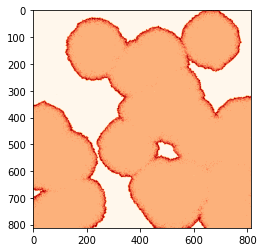

At day 231, only 182937 people are never infected.
At day 232, only 181114 people are never infected.
At day 233, only 179372 people are never infected.
At day 234, only 177605 people are never infected.
At day 235, only 175891 people are never infected.
At day 236, only 174179 people are never infected.
At day 237, only 172482 people are never infected.
At day 238, only 170780 people are never infected.
At day 239, only 169124 people are never infected.
At day 240, only 167427 people are never infected.


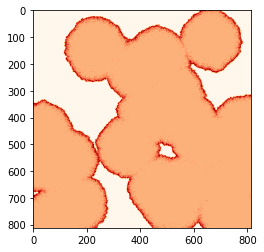

At day 241, only 165773 people are never infected.
At day 242, only 164131 people are never infected.
At day 243, only 162543 people are never infected.
At day 244, only 160901 people are never infected.
At day 245, only 159345 people are never infected.
At day 246, only 157794 people are never infected.
At day 247, only 156252 people are never infected.
At day 248, only 154738 people are never infected.
At day 249, only 153233 people are never infected.
At day 250, only 151717 people are never infected.


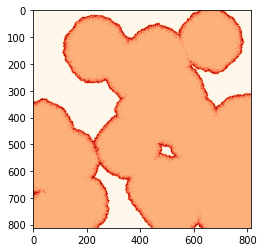

At day 251, only 150216 people are never infected.
At day 252, only 148788 people are never infected.
At day 253, only 147267 people are never infected.
At day 254, only 145792 people are never infected.
At day 255, only 144298 people are never infected.
At day 256, only 142786 people are never infected.
At day 257, only 141311 people are never infected.
At day 258, only 139879 people are never infected.
At day 259, only 138479 people are never infected.
At day 260, only 137041 people are never infected.


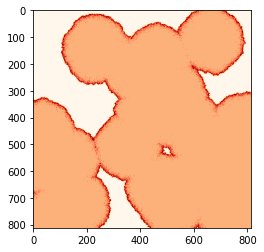

At day 261, only 135622 people are never infected.
At day 262, only 134221 people are never infected.
At day 263, only 132828 people are never infected.
At day 264, only 131432 people are never infected.
At day 265, only 130088 people are never infected.
At day 266, only 128689 people are never infected.
At day 267, only 127302 people are never infected.
At day 268, only 125917 people are never infected.
At day 269, only 124542 people are never infected.
At day 270, only 123147 people are never infected.


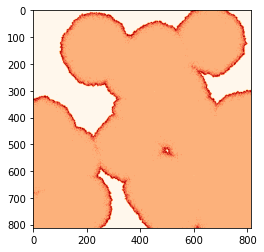

At day 271, only 121836 people are never infected.
At day 272, only 120467 people are never infected.
At day 273, only 119139 people are never infected.
At day 274, only 117783 people are never infected.
At day 275, only 116464 people are never infected.
At day 276, only 115164 people are never infected.
At day 277, only 113858 people are never infected.
At day 278, only 112560 people are never infected.
At day 279, only 111252 people are never infected.
At day 280, only 109962 people are never infected.


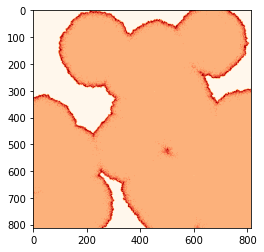

At day 281, only 108650 people are never infected.
At day 282, only 107354 people are never infected.
At day 283, only 106047 people are never infected.
At day 284, only 104771 people are never infected.
At day 285, only 103474 people are never infected.
At day 286, only 102190 people are never infected.
At day 287, only 100920 people are never infected.
At day 288, only 99648 people are never infected.
At day 289, only 98405 people are never infected.
At day 290, only 97169 people are never infected.


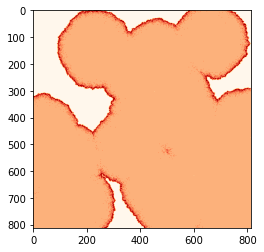

At day 291, only 95950 people are never infected.
At day 292, only 94702 people are never infected.
At day 293, only 93520 people are never infected.
At day 294, only 92317 people are never infected.
At day 295, only 91143 people are never infected.
At day 296, only 89949 people are never infected.
At day 297, only 88747 people are never infected.
At day 298, only 87627 people are never infected.
At day 299, only 86450 people are never infected.
At day 300, only 85319 people are never infected.


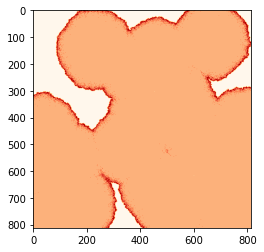

At day 301, only 84235 people are never infected.
At day 302, only 83122 people are never infected.
At day 303, only 82046 people are never infected.
At day 304, only 80932 people are never infected.
At day 305, only 79851 people are never infected.
At day 306, only 78788 people are never infected.
At day 307, only 77701 people are never infected.
At day 308, only 76587 people are never infected.
At day 309, only 75516 people are never infected.
At day 310, only 74453 people are never infected.


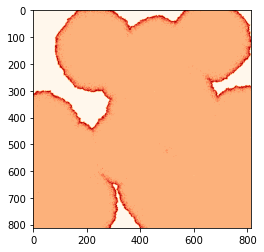

At day 311, only 73376 people are never infected.
At day 312, only 72318 people are never infected.
At day 313, only 71269 people are never infected.
At day 314, only 70236 people are never infected.
At day 315, only 69219 people are never infected.
At day 316, only 68180 people are never infected.
At day 317, only 67141 people are never infected.
At day 318, only 66116 people are never infected.
At day 319, only 65159 people are never infected.
At day 320, only 64198 people are never infected.


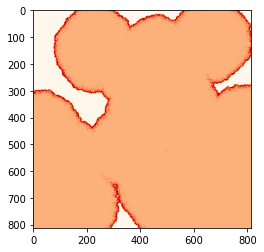

At day 321, only 63261 people are never infected.
At day 322, only 62349 people are never infected.
At day 323, only 61448 people are never infected.
At day 324, only 60555 people are never infected.
At day 325, only 59613 people are never infected.
At day 326, only 58745 people are never infected.
At day 327, only 57854 people are never infected.
At day 328, only 56978 people are never infected.
At day 329, only 56112 people are never infected.
At day 330, only 55197 people are never infected.


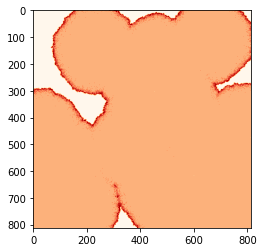

At day 331, only 54348 people are never infected.
At day 332, only 53520 people are never infected.
At day 333, only 52694 people are never infected.
At day 334, only 51848 people are never infected.
At day 335, only 51007 people are never infected.
At day 336, only 50123 people are never infected.
At day 337, only 49313 people are never infected.
At day 338, only 48476 people are never infected.
At day 339, only 47635 people are never infected.
At day 340, only 46805 people are never infected.


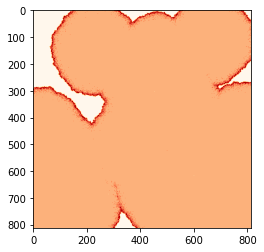

At day 341, only 46028 people are never infected.
At day 342, only 45240 people are never infected.
At day 343, only 44485 people are never infected.
At day 344, only 43710 people are never infected.
At day 345, only 42878 people are never infected.
At day 346, only 42105 people are never infected.
At day 347, only 41334 people are never infected.
At day 348, only 40604 people are never infected.
At day 349, only 39899 people are never infected.
At day 350, only 39176 people are never infected.


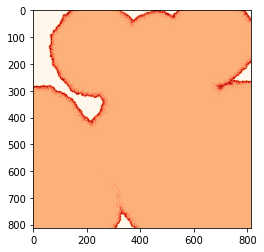

At day 351, only 38486 people are never infected.
At day 352, only 37788 people are never infected.
At day 353, only 37118 people are never infected.
At day 354, only 36427 people are never infected.
At day 355, only 35740 people are never infected.
At day 356, only 35065 people are never infected.
At day 357, only 34409 people are never infected.
At day 358, only 33783 people are never infected.
At day 359, only 33158 people are never infected.
At day 360, only 32539 people are never infected.


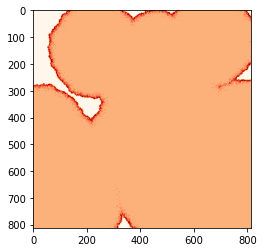

At day 361, only 31916 people are never infected.
At day 362, only 31253 people are never infected.
At day 363, only 30639 people are never infected.
At day 364, only 30016 people are never infected.
At day 365, only 29387 people are never infected.
At day 366, only 28767 people are never infected.
At day 367, only 28178 people are never infected.
At day 368, only 27599 people are never infected.
At day 369, only 27007 people are never infected.
At day 370, only 26483 people are never infected.


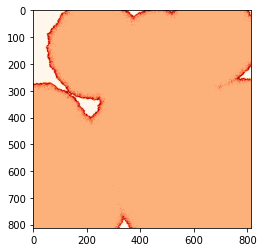

At day 371, only 25943 people are never infected.
At day 372, only 25399 people are never infected.
At day 373, only 24901 people are never infected.
At day 374, only 24377 people are never infected.
At day 375, only 23902 people are never infected.
At day 376, only 23389 people are never infected.
At day 377, only 22920 people are never infected.
At day 378, only 22452 people are never infected.
At day 379, only 21993 people are never infected.
At day 380, only 21534 people are never infected.


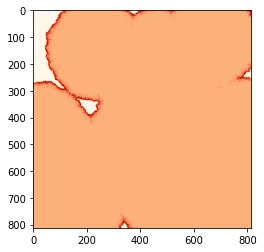

At day 381, only 21113 people are never infected.
At day 382, only 20685 people are never infected.
At day 383, only 20246 people are never infected.
At day 384, only 19807 people are never infected.
At day 385, only 19404 people are never infected.
At day 386, only 19019 people are never infected.
At day 387, only 18619 people are never infected.
At day 388, only 18259 people are never infected.
At day 389, only 17904 people are never infected.
At day 390, only 17541 people are never infected.


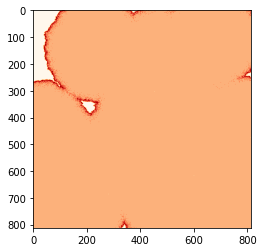

At day 391, only 17187 people are never infected.
At day 392, only 16805 people are never infected.
At day 393, only 16502 people are never infected.
At day 394, only 16207 people are never infected.
At day 395, only 15883 people are never infected.
At day 396, only 15576 people are never infected.
At day 397, only 15288 people are never infected.
At day 398, only 14998 people are never infected.
At day 399, only 14717 people are never infected.
At day 400, only 14461 people are never infected.


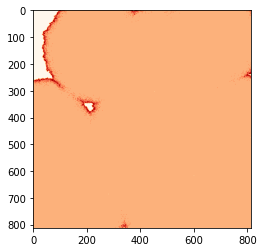

At day 401, only 14178 people are never infected.
At day 402, only 13911 people are never infected.
At day 403, only 13673 people are never infected.
At day 404, only 13434 people are never infected.
At day 405, only 13238 people are never infected.
At day 406, only 13025 people are never infected.
At day 407, only 12798 people are never infected.
At day 408, only 12578 people are never infected.
At day 409, only 12384 people are never infected.
At day 410, only 12191 people are never infected.


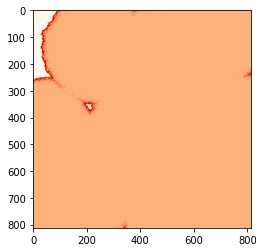

At day 411, only 11991 people are never infected.
At day 412, only 11779 people are never infected.
At day 413, only 11577 people are never infected.
At day 414, only 11352 people are never infected.
At day 415, only 11140 people are never infected.
At day 416, only 10950 people are never infected.
At day 417, only 10755 people are never infected.
At day 418, only 10562 people are never infected.
At day 419, only 10360 people are never infected.
At day 420, only 10157 people are never infected.


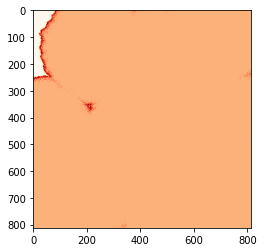

At day 421, only 9969 people are never infected.
At day 422, only 9795 people are never infected.
At day 423, only 9623 people are never infected.
At day 424, only 9452 people are never infected.
At day 425, only 9266 people are never infected.
At day 426, only 9087 people are never infected.
At day 427, only 8924 people are never infected.
At day 428, only 8769 people are never infected.
At day 429, only 8617 people are never infected.
At day 430, only 8450 people are never infected.


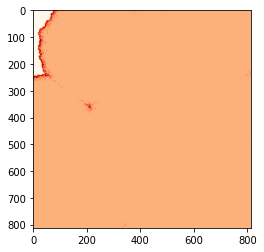

At day 431, only 8286 people are never infected.
At day 432, only 8148 people are never infected.
At day 433, only 8001 people are never infected.
At day 434, only 7837 people are never infected.
At day 435, only 7679 people are never infected.
At day 436, only 7516 people are never infected.
At day 437, only 7367 people are never infected.
At day 438, only 7205 people are never infected.
At day 439, only 7042 people are never infected.
At day 440, only 6899 people are never infected.


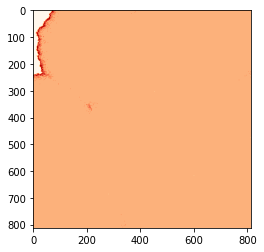

At day 441, only 6765 people are never infected.
At day 442, only 6620 people are never infected.
At day 443, only 6469 people are never infected.
At day 444, only 6327 people are never infected.
At day 445, only 6198 people are never infected.
At day 446, only 6041 people are never infected.
At day 447, only 5899 people are never infected.
At day 448, only 5760 people are never infected.
At day 449, only 5625 people are never infected.
At day 450, only 5478 people are never infected.


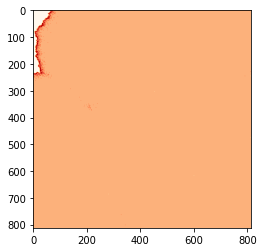

At day 451, only 5323 people are never infected.
At day 452, only 5181 people are never infected.
At day 453, only 5042 people are never infected.
At day 454, only 4905 people are never infected.
At day 455, only 4750 people are never infected.
At day 456, only 4629 people are never infected.
At day 457, only 4477 people are never infected.
At day 458, only 4334 people are never infected.
At day 459, only 4200 people are never infected.
At day 460, only 4069 people are never infected.


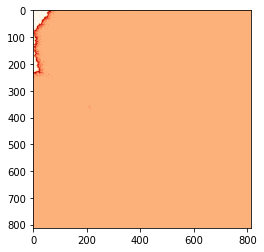

At day 461, only 3926 people are never infected.
At day 462, only 3790 people are never infected.
At day 463, only 3647 people are never infected.
At day 464, only 3498 people are never infected.
At day 465, only 3348 people are never infected.
At day 466, only 3214 people are never infected.
At day 467, only 3067 people are never infected.
At day 468, only 2944 people are never infected.
At day 469, only 2805 people are never infected.
At day 470, only 2689 people are never infected.


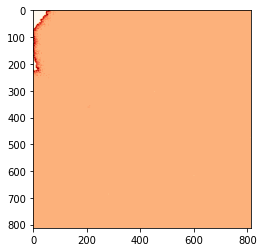

At day 471, only 2574 people are never infected.
At day 472, only 2467 people are never infected.
At day 473, only 2371 people are never infected.
At day 474, only 2284 people are never infected.
At day 475, only 2189 people are never infected.
At day 476, only 2109 people are never infected.
At day 477, only 2032 people are never infected.
At day 478, only 1958 people are never infected.
At day 479, only 1883 people are never infected.
At day 480, only 1814 people are never infected.


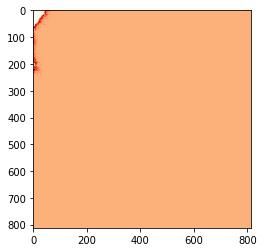

At day 481, only 1745 people are never infected.
At day 482, only 1688 people are never infected.
At day 483, only 1640 people are never infected.
At day 484, only 1587 people are never infected.
At day 485, only 1536 people are never infected.
At day 486, only 1476 people are never infected.
At day 487, only 1424 people are never infected.
At day 488, only 1371 people are never infected.
At day 489, only 1326 people are never infected.
At day 490, only 1290 people are never infected.


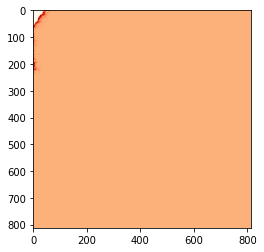

At day 491, only 1243 people are never infected.
At day 492, only 1217 people are never infected.
At day 493, only 1180 people are never infected.
At day 494, only 1147 people are never infected.
At day 495, only 1116 people are never infected.
At day 496, only 1082 people are never infected.
At day 497, only 1048 people are never infected.
At day 498, only 1017 people are never infected.
At day 499, only 981 people are never infected.
At day 500, only 948 people are never infected.


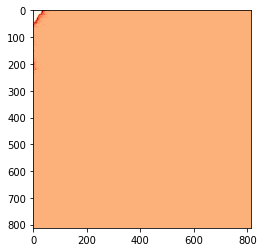

At day 501, only 913 people are never infected.
At day 502, only 874 people are never infected.


In [13]:
if __name__ == "__main__":
    simulate()